In [72]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sigmoid function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)


In [73]:
# Input dataset: each row is a sample
X = np.array([
    [0.25], 
    [0.30]
])
y = np.array([
    [0.12]
])

# Initialize weights and biases
np.random.seed(42)
W1 = np.random.rand(4, 2)  # 2 inputs → 4 hidden
b1 = np.full((4, 1), 0.35)

W2 = np.random.rand(1, 4)  # 4 hidden → 1 output
b2 = np.full((1, 1), 0.60)

# Learning rate
eta = 0.5


In [74]:
losses = []
epochs = 100
a0 = X

for epoch in range(epochs):
    total_loss = 0    

    z1 = W1 @ a0 + b1
    a1 = sigmoid(z1)

    z2 = W2 @ a1 + b2
    a2 = sigmoid(z2)

    # Loss
    error = a2 - y
    loss = 0.5 * error.T @ error
    # print(f"{error}")

    # Backward pass
    delta2 = error * sigmoid_derivative(z2)
    delta1 = (W2.T @ delta2) * sigmoid_derivative(z1)

    # Weight updates
    W2 = W2 - eta * delta2 @ a1.T
    b2 = b2 - eta * delta2

    W1 = W1 - eta * delta1 @ a0.T
    b1 = b1 - eta * delta1

    losses.append(loss[0][0])
    # print(total_loss[0][0])

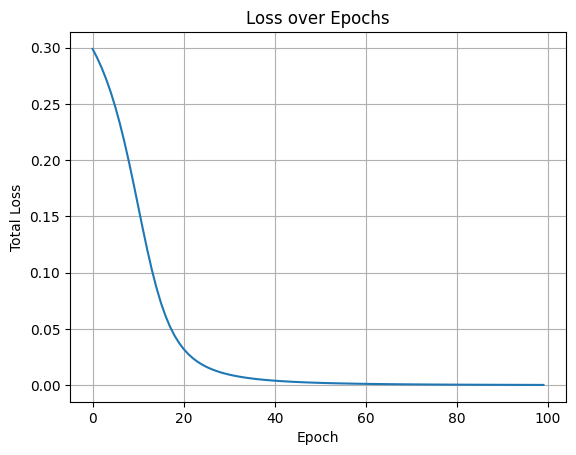

In [75]:
sns.lineplot(losses)
plt.xlabel("Epoch")
plt.ylabel("Total Loss")
plt.title("Loss over Epochs")
plt.grid(True)
plt.show()